<a href="https://colab.research.google.com/github/Dabi1021/Lending_Club/blob/main/Lending_club.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.비지니스 모델 설계
    - 목적1 (채권자 입장): 여러요인을 종합적으로 고려하여 채무를 잘 이행할 채무자를 선별 -> 대출여부를 결정하는 모델 생성 -> 수익률 증가

    - 목적2 (고객 입장): 대출을 받기위해 개선이 필요한 feature 추천

# 배경 지식
    https://chancoding.tistory.com/62

    - P2P(Peer-to-Peer): 개인과 개인간의 채무관계의 대출,  한 명의 채무 자체가 여러 채권자들이 조금씩 돈을 투자해서 funding금액을 모아서 대출을 해주는 방식
    - P2P 대출의 장점은 까다로운 기관 대출에 비해서 더 쉽고 간편하게 대출할 수 있습니다. 또한, 소액대출에 있어서 카드 신용 대출보다 적은 이자비용이 발생
    - p2p플랫폼이 중간다리 역할로 다수의 채권자들에게 돈을 모으는 업무, 채무자들의 대출 신청을 받아서 채권자들과 연결해주는 작업을 수행

    - LendingClub : 미국 샌프란시스코에 본사를 둔 미국 P2P 대출 회사

# kaggle : https://www.kaggle.com/datasets/wordsforthewise/lending-club
    

# 2.데이터 가져오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/팀프로젝트/Lending_club/lending_club_loan_two.csv')

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


## feature information
    - loan_amnt : 대출 금액. (특정 시점에 업데이트)
    - term : 할부 개월 (월 단위) 36 or 60
    - int_rate : 대출 이자율
    - installment : 지불해야 하는 월별 지불금.
    - grade : LC 지정 대출 등급 - target
    - sub_grade : LC 할당 대출 하위 등급** 설명이 필요 -target
    - emp_title : 신청자의 직업
    - emp_length : 고용 기간(0 ~ 10년) 0은 1년 미만을 의미, 10은 10년 이상 의미
    - home_ownership : 차용인의 주택 소유 상태
    - annual_inc : 연간 소득.
    - validation_status : LC에서 소득이 확인되었는지, 확인되지 않았는지 또는 소득원이 확인되었는지
    - issue_d : 대출 자금이 조달된 월
    - loan_status : 대출 현황 - target
    - purpose : 대출 목적.
    - title : 차용인이 제공한 대출 제목
    - dti : 월별 부채 총액을 월 소득으로 나누어 계산한 비율.
    - earliest_cr_line : 차용인의 가장 먼저 보고된 신용 한도가 열린 달
    - open_acc : 대출자의 신용 파일에 있는 열린 신용 한도 수
    - revol_bal : 대출 총액
    - revol_util : 남은 대출 한도액 / 대출 가능 한도
    - total_acc : 현재 대출자의 신용 파일에 있는 총 신용 라인 수
    - initial_list_status : 대출의 초기 목록 상태(W, F)
    - application_type : 대출이 개별 신청인지 또는 두 명의 공동 차용자와의 공동 신청인지
    - mort_acc : 계좌 수.
    - pub_rec : 공공 기록의 수(파산, 대출 미상환 등등)
    - pub_rec_bankruptcies : 공개 기록 파산 건수
    - address : 주소



## 분석 방향 선정(기업 입장)
    - 대출자의 여러 조건을 고려하여 대출 등급을 정하는 모델을 생성
    - 궁금한 점: 신용 회전이 무엇? 카드 돌려막기와 비슷한 개념인가?

# 3.데이터 전처리

## 3-1. drop column
    - grade: sub_grad로 디테일한 등급을 사용하기로 결정
    - issue_d: 대출을 받은 날짜 개념이므로 상관없다고 판단
    - title: purpose와 같은 역활로 중복된다고 판단
    - earliest_cr_line: 의미가 없다고 판단
    - address: 의미가 없다고 판단
    - pub_rec_bankruptcies: pub_rec 포함된 사항으로 중복 판단

In [ ]:
df = df.drop(['grade', 'issue_d', 'title', 'earliest_cr_line', 'address', 'pub_rec_bankruptcies'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            396030 non-null  float64
 1   term                 396030 non-null  object 
 2   int_rate             396030 non-null  float64
 3   installment          396030 non-null  float64
 4   sub_grade            396030 non-null  object 
 5   emp_title            373103 non-null  object 
 6   emp_length           377729 non-null  object 
 7   home_ownership       396030 non-null  object 
 8   annual_inc           396030 non-null  float64
 9   verification_status  396030 non-null  object 
 10  loan_status          396030 non-null  object 
 11  purpose              396030 non-null  object 
 12  dti                  396030 non-null  float64
 13  open_acc             396030 non-null  float64
 14  pub_rec              396030 non-null  float64
 15  revol_bal        

## 3-2.결측치 처리

### revol_util 결측 데이터 -> 아주 작은 비율이므로 drop

In [ ]:
df = df.drop(df[df['revol_util'].isna()].index, axis=0)

In [ ]:
df.isna().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
sub_grade                  0
emp_title              22912
emp_length             18290
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
dti                        0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
application_type           0
mort_acc               37740
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395754 entries, 0 to 396029
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            395754 non-null  float64
 1   term                 395754 non-null  object 
 2   int_rate             395754 non-null  float64
 3   installment          395754 non-null  float64
 4   sub_grade            395754 non-null  object 
 5   emp_title            372842 non-null  object 
 6   emp_length           377464 non-null  object 
 7   home_ownership       395754 non-null  object 
 8   annual_inc           395754 non-null  float64
 9   verification_status  395754 non-null  object 
 10  loan_status          395754 non-null  object 
 11  purpose              395754 non-null  object 
 12  dti                  395754 non-null  float64
 13  open_acc             395754 non-null  float64
 14  pub_rec              395754 non-null  float64
 15  revol_bal        

### 'emp_title', 'emp_length' 가 모두 null이면 - 무직

In [ ]:
df.isna().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
sub_grade                  0
emp_title              22912
emp_length             18290
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
dti                        0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
application_type           0
mort_acc               37740
dtype: int64

In [ ]:
df.loc[df['emp_title'].isnull() & df['emp_length'].isnull(), 'emp_title'], df.loc[(df['emp_title'] == 'No Job') & df['emp_length'].isnull(), 'emp_length'] = 'No Job', 0

In [ ]:
df.isna().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
sub_grade                  0
emp_title               4799
emp_length               177
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
dti                        0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
application_type           0
mort_acc               37740
dtype: int64

### emp_title 만 null인 경우 -> etc

In [ ]:
df.loc[df['emp_title'].isnull(), 'emp_title'] = 'etc'

In [ ]:
df.isna().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
sub_grade                  0
emp_title                  0
emp_length               177
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
dti                        0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
application_type           0
mort_acc               37740
dtype: int64

### emp_length만 null인 경우 -> 0

In [ ]:
df.loc[df['emp_length'].isnull(), 'emp_length'] = 0

In [ ]:
df.isna().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
dti                        0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
application_type           0
mort_acc               37740
dtype: int64

### mort_acc 결측치 채우기
    - home_ownership이 mortgage인 경우는 1
    - 나머지는 0

In [ ]:
df.loc[df['mort_acc'].isna() & (df['home_ownership'] == ''), 'mort_acc'] = 1
df.loc[df['mort_acc'].isna(), 'mort_acc'] = 0

In [ ]:
df.isna().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
dti                    0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
initial_list_status    0
application_type       0
mort_acc               0
dtype: int64

### emp_title

In [ ]:
df['emp_title'].fillna('', inplace=True)

In [ ]:
# ['Corporation', 'LLC', 'Inc']를 포함하면 corporation으로 정리
df['emp_category'] = df['emp_title'].apply(lambda x: 'Corporation' if any(keyword in x.lower() for keyword in ['corporation', 'llc', 'inc', 'corp']) else x)

In [ ]:
# ['manager', 'supervisor'] 포함하면 manger로 정리
df['emp_category'] = df['emp_category'].apply(lambda x: 'Manager' if any(keyword in x.lower() for keyword in ['manager', 'supervisor']) else x)

In [ ]:
# 전문 직종
professional_titles = [
        'accountant',
        'architect',
        'attorney',
        'dentist',
        'engineer',
        'financial analyst',
        'graphic designer',
        'nurse',
        'pharmacist',
        'physician',
        'software developer',
        'data scientist',
        'psychologist',
        'marketing manager',
        'veterinarian',
        'biomedical engineer',
        'civil engineer',
        'interior designer',
        'pharmaceutical sales representative',
        'industrial designer',
        'biotechnologist',
        'environmental scientist',
        'geologist',
        'physiotherapist',
        'mathematician',
        'chemist',
        'professor',
        'economist',
        'librarian',
        'sociologist',
        'electrician',
        'plumber',
        'chef',
        'fashion designer',
        'social worker',
        'zoologist',
        'meteorologist',
        'nutritionist',
        'landscape architect',
        'rn'
        'Specialist'
        'Technologist'
        ]
df['emp_category'] = df['emp_category'].apply(lambda x: 'Professional' if any(keyword in x.lower() for keyword in professional_titles) else x)

In [ ]:
public_servant_titles = [
        'civil servant',
        'government administrator',
        'police officer',
        'firefighter',
        'judge',
        'prosecutor',
        'mayor',
        'senator',
        'congressman',
        'diplomat',
        'public health officer',
        'environmental inspector',
        'social worker',
        'municipal clerk',
        'city planner',
        'tax inspector',
        'military officer',
        'customs officer',
        'border patrol agent',
        'correctional officer',
        'postal worker',
        'park ranger',
        'conservation officer',
        'forester',
        'urban planner',
        'school administrator',
        'librarian',
        'archivist',
        'historian',
        'public affairs specialist',
        'public relations manager',
        'foreign service officer',
        'teacher'
        'corrections major'
    ]
df['emp_category'] = df['emp_category'].apply(lambda x: 'Public' if any(keyword in x.lower() for keyword in public_servant_titles) else x)

In [ ]:
medical_titles = [
        'physician',
        'surgeon',
        'nurse',
        'dentist',
        'pharmacist',
        'paramedic',
        'radiologist',
        'anesthesiologist',
        'dermatologist',
        'pediatrician',
        'psychiatrist',
        'orthopedic surgeon',
        'obstetrician',
        'gynecologist',
        'ophthalmologist',
        'audiologist',
        'pathologist',
        'veterinarian',
        'phlebotomist',
        'medical laboratory technician',
        'occupational therapist',
        'physical therapist',
        'respiratory therapist',
        'speech therapist',
        'chiropractor',
        'acupuncturist',
        'clinical psychologist',
        'nutritionist',
        'genetic counselor',
        'radiation therapist',
        'medical illustrator',
        'biomedical engineer',
        'medical researcher',
        'public health analyst',
        'RN'
        'registered nurse'
    ]
df['emp_category'] = df['emp_category'].apply(lambda x: 'Medical' if any(keyword in x.lower() for keyword in medical_titles) else x)

In [ ]:
education_titles = [
        'teacher',
        'professor',
        'instructor',
        'principal',
        'dean',
        'librarian',
        'instructional designer',
        'tutor',
        'educator',
        'instructor',
        'e-learning developer']
df['emp_category'] = df['emp_category'].apply(lambda x: 'Education' if any(keyword in x.lower() for keyword in medical_titles) else x)

In [ ]:
df.loc[df['emp_title'] == '','emp_title'] = None
# 직원 직함('emp_category') 열에서 고유한 값의 카운트
value_counts = df['emp_category'].value_counts()

# 값이 1 이하인 항목 추출
filtered_value_counts = value_counts[value_counts <= 1]

# 값이 1인 경우 'emp_title' 열을 'small business owner'로 변경
if (filtered_value_counts == 1).any():
    df.loc[df['emp_category'].isin(filtered_value_counts.index), 'emp_category'] = 'small business owner'



In [ ]:
df['emp_category'].value_counts()

small business owner                 115786
Manager                               47443
Professional                          23432
Corporation                           18972
No Job                                18113
                                      ...  
Cooper Standard                           2
Executive Protection                      2
Flushing Radiation Oncology               2
Senior Development Consultant             2
Laurens County Board of Education         2
Name: emp_category, Length: 22852, dtype: int64

In [ ]:
df['emp_category'] = df['emp_category'].apply(lambda x: x.lower())

### emp_title drop/ emp_category에 정리되어있음

In [ ]:
df = df.drop('emp_title', axis=1)

### 결측치 처리된 데이터 저장

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,emp_category
0,10000.0,36 months,11.44,329.48,B4,10+ years,RENT,117000.0,Not Verified,Fully Paid,...,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,marketing
1,8000.0,36 months,11.99,265.68,B5,4 years,MORTGAGE,65000.0,Not Verified,Fully Paid,...,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,credit analyst
2,15600.0,36 months,10.49,506.97,B3,< 1 year,RENT,43057.0,Source Verified,Fully Paid,...,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,statistician
3,7200.0,36 months,6.49,220.65,A2,6 years,RENT,54000.0,Not Verified,Fully Paid,...,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,small business owner
4,24375.0,60 months,17.27,609.33,C5,9 years,MORTGAGE,55000.0,Verified,Charged Off,...,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,corporation


In [ ]:
df.to_csv('lending_club.csv')

## 3-3.범주형 데이터 labeling
    - term = {'36 months' : 0, '60 months' : 1}
    - sub_grade = {'A': 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7}
    - emp_title = 전문직종, 의학계열 등 카테고리로 분류 -> emp_category
    - emp_length = 숫자만 가져오기
    - verification_status = {'Not Verified' : 0, 'Source Verified' : 1, 'Verified' : 2}

### label encoder 사용
    - home_ownership
    - loan_status = {'Charged Off': 0, 'Fully Paid' : 1}
    - purpose
    - initial_list_status
    - application_type


### term

In [ ]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
df['term'] = df['term'].apply(lambda x : str(x).replace(' 36 months', '0'))
df['term'] = df['term'].apply(lambda x : str(x).replace(' 60 months', '1'))
df['term'] = df['term'].astype('int')

In [ ]:
df['term'].unique()

array([0, 1])

### sub_grade

In [ ]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [ ]:
df['sub_grade'] = df['sub_grade'].apply(lambda x : str(x).replace('A', '1'))
df['sub_grade'] = df['sub_grade'].apply(lambda x : str(x).replace('B', '2'))
df['sub_grade'] = df['sub_grade'].apply(lambda x : str(x).replace('C', '3'))
df['sub_grade'] = df['sub_grade'].apply(lambda x : str(x).replace('D', '4'))
df['sub_grade'] = df['sub_grade'].apply(lambda x : str(x).replace('E', '5'))
df['sub_grade'] = df['sub_grade'].apply(lambda x : str(x).replace('F', '6'))
df['sub_grade'] = df['sub_grade'].apply(lambda x : str(x).replace('G', '7'))
df['sub_grade'] = df['sub_grade'].astype('int')

In [ ]:
df['sub_grade'].unique()

array([24, 25, 23, 12, 35, 33, 11, 22, 31, 15, 54, 14, 13, 41, 32, 21, 43,
       45, 42, 51, 52, 55, 64, 53, 44, 71, 65, 72, 34, 61, 63, 75, 74, 62,
       73])

### emp_length

In [ ]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year', 0],
      dtype=object)

In [ ]:
import re

df['emp_length'] = df['emp_length'].apply(lambda x : re.sub(r'[^0-9]', '', str(x)))
df['emp_length'] = df['emp_length'].astype('int')

In [ ]:
df['emp_length'].unique()

array([10,  4,  1,  6,  9,  2,  3,  8,  7,  5,  0])

### verification_status

In [ ]:
df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [ ]:
df['verification_status'] = df['verification_status'].apply(lambda x : str(x).replace('Not Verified', '0'))
df['verification_status'] = df['verification_status'].apply(lambda x : str(x).replace('Source Verified', '1'))
df['verification_status'] = df['verification_status'].apply(lambda x : str(x).replace('Verified', '2'))
df['verification_status'] = df['verification_status'].astype('int')

In [ ]:
df['verification_status'].unique()

array([0, 1, 2])

### 나머지 label encoder 사용
    home_ownership, loan_status, purpose, initial_list_status, application_type




In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in df[['home_ownership', 'loan_status', 'purpose', 'initial_list_status', 'application_type', 'emp_category']].columns:
    df[column] = df[column].astype(str)
    df[column] = le.fit_transform(df[column])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395754 entries, 0 to 396029
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            395754 non-null  float64
 1   term                 395754 non-null  int64  
 2   int_rate             395754 non-null  float64
 3   installment          395754 non-null  float64
 4   sub_grade            395754 non-null  int64  
 5   emp_length           395754 non-null  int64  
 6   home_ownership       395754 non-null  int64  
 7   annual_inc           395754 non-null  float64
 8   verification_status  395754 non-null  int64  
 9   loan_status          395754 non-null  int64  
 10  purpose              395754 non-null  int64  
 11  dti                  395754 non-null  float64
 12  open_acc             395754 non-null  float64
 13  pub_rec              395754 non-null  float64
 14  revol_bal            395754 non-null  float64
 15  revol_util       

## 3-4.중복값제거

In [ ]:
df.duplicated().sum()

0

### labeling data 저장

In [ ]:
df.to_csv('lending_club_labeled.csv')

# 4.탐색적 데이터 분석

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/팀프로젝트/Lending_club/lending_club.csv', index_col=0)
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,emp_category
0,10000.0,36 months,11.44,329.48,B4,10+ years,RENT,117000.0,Not Verified,Fully Paid,...,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,marketing
1,8000.0,36 months,11.99,265.68,B5,4 years,MORTGAGE,65000.0,Not Verified,Fully Paid,...,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,credit analyst
2,15600.0,36 months,10.49,506.97,B3,< 1 year,RENT,43057.0,Source Verified,Fully Paid,...,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,statistician
3,7200.0,36 months,6.49,220.65,A2,6 years,RENT,54000.0,Not Verified,Fully Paid,...,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,small business owner
4,24375.0,60 months,17.27,609.33,C5,9 years,MORTGAGE,55000.0,Verified,Charged Off,...,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,corporation


## class별 data

In [ ]:
status_counts = df['loan_status'].value_counts()

total_loans = len(df)
status_ratios = status_counts / total_loans

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="loan_status", hue="loan_status")

plt.xlabel("Loan Status")
plt.ylabel("Count")

plt.legend(title="Loan Status", labels=["Fully Paid", "Charged Off"])

for i, status in enumerate(status_counts.index):
    ratio = status_ratios[i]
    plt.text(i, status_counts[i], f"{ratio:.2%}", ha='center', va='top', fontsize=12)

plt.show()

## numeric data barplot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols = len(numerical_columns)
num_rows = num_cols // 4
num_rows += num_rows % 4
position = range(1, num_cols+1)


fig = plt.figure(figsize=(16, num_rows * 4))

#서브플롯으로 boxplot 그리기
fig = plt.figure(figsize=(16, num_rows*4))
for k, col in zip(position, numerical_columns):
  ax = fig.add_subplot(num_rows, 5, k)

  sns.boxplot(data=df, ax=ax, x='loan_status', y=col)
  ax.set_title(col)

plt.tight_layout()
plt.show()

## 이상치 제거 후

In [ ]:
#q1, q3,irq 계산
def_df = df
for col in numerical_columns:
  q1, q3 = np.percentile(df[col], [25, 75])
  iqr = q3 - q1

  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)

  def_df = def_df[(def_df[col] >= lower_bound) & (def_df[col] <= upper_bound)]

In [ ]:
fig = plt.figure(figsize=(16, num_rows * 4))

#서브플롯으로 boxplot 그리기
fig = plt.figure(figsize=(16, num_rows*4))
for k, col in zip(position, numerical_columns):
  ax = fig.add_subplot(num_rows, 5, k)

  sns.boxplot(data=def_df, ax=ax, x='loan_status', y=col)
  ax.set_title(col)

plt.tight_layout()
plt.show()

## loan_status // purpose

In [ ]:
columns_to_plot = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'pub_rec', 'total_acc', 'mort_acc']

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.set_palette('bright')
    sns.barplot(x='loan_status', data=df, y=column, hue='purpose', palette='bright')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title(column)
    plt.xlabel('loan_status')
    plt.ylabel(column)
    plt.show()

#loan_amnt            : 대출 신청 금액
#int_rate             : 대출 이자율
#installment          : 월별 지불금
#grade                : 신용 등급
#annual_inc           : 연간 소득
#dti                  : 월별 부채 총액 / 월 소득
#pub_rec              : 경멸적인 공개 기록의 수
#total_acc            : 총 신용 한도 수
#mort_acc             : 모기지 계좌 수
#pub_rec_bankruptcies : 공공 기록 파산 건수

## 목적별 대출 현황으로 나눈 대출 신청 금액

In [ ]:
sns.barplot(data=df, x="purpose",y="loan_amnt", hue='loan_status')
plt.xticks(rotation = 80)
plt.show()

## 목적에 따른 대출 현황

In [ ]:
sns.histplot(df, x="purpose", hue="loan_status")
plt.xticks(rotation = 80)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x="purpose", hue="loan_status", multiple="fill", shrink=0.8)

total_counts = df['purpose'].value_counts()

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(f'{height*100 : .2f}%', xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.xticks(rotation = 80)
plt.xlabel('purpose')
plt.ylabel('Count')

plt.show()

## 상환기간이 길면 charged off 비율이 높다.


In [ ]:
sns.histplot(df, x="term", hue="loan_status", multiple='stack')

In [ ]:
columns_to_plot = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'pub_rec', 'total_acc', 'mort_acc']
a = df.sort_values(by='loan_status')

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.set_palette('bright')
    sns.barplot(x='term', data=df, y=column, hue='loan_status')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title(column)
    plt.xlabel('term')
    plt.ylabel(column)
    plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x="term", hue="loan_status", multiple="fill", shrink=0.8)

total_counts = df['term'].value_counts()

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(f'{height*100 : .2f}%', xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.xlabel('term')
plt.ylabel('Count')

plt.show()

## sub_grade

In [ ]:
unique_grades = sorted(df['sub_grade'].unique())
df['sub_grade'] = pd.Categorical(df['sub_grade'], categories=unique_grades, ordered=True)


plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x="sub_grade", hue="loan_status", multiple="fill", shrink=0.8)

total_counts = df['sub_grade'].value_counts()

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(f'{height*100 : .2f}%', xy=(left+width/2, bottom+height/2), ha='center', va='bottom', rotation=90)
plt.xticks(rotation = 80)
plt.xlabel('sub_grade')
plt.ylabel('Count')

plt.show()

## emp_length 칼럼 순서 변환

In [ ]:
desired_order = ['0', '< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
df['emp_length'] = pd.Categorical(df['emp_length'], categories=desired_order, ordered=True)

x = df['emp_category'].value_counts()[:20].index
df_top_20_emp_category = df[df['emp_category'].isin(x)]

In [ ]:
plt.figure(figsize=(15, 7))
ax = sns.histplot(data=df_top_20_emp_category, x='emp_category', hue="loan_status", multiple="fill", shrink=0.8)

total_counts = df[col].value_counts()

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(f'{height*100 : .2f}%', xy=(left+width/2, bottom+height/2), ha='center', va='center', rotation=90)
plt.title(col)
plt.xticks(rotation = 80)
plt.ylabel('Count')

plt.show()

In [ ]:
ob_col = ['emp_length', 'home_ownership', 'verification_status','initial_list_status', 'application_type']

for col in ob_col:
  plt.figure(figsize=(15, 7))
  ax = sns.histplot(data=df, x=col, hue="loan_status", multiple="fill", shrink=0.8)

  total_counts = df[col].value_counts()

  for p in ax.patches:
      left, bottom, width, height = p.get_bbox().bounds
      ax.annotate(f'{height*100 : .2f}%', xy=(left+width/2, bottom+height/2), ha='center', va='center', rotation=90)
  plt.title(col)
  plt.xticks(rotation = 80)
  plt.ylabel('Count')

plt.show()

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

## 못갚는 사람들중 목적이 debt_consolidation, credit_card 인것...

In [ ]:
Charged_Off_df = df[df['loan_status'] == 'Charged Off']
Charged_Off_temp_df = Charged_Off_df[(Charged_Off_df['purpose'] == 'debt_consolidation') | (Charged_Off_df['purpose'] == 'credit_card')]

columns_to_plot = ['dti', 'installment', 'loan_amnt', 'annual_inc', 'total_acc']

unique_grades = sorted(Charged_Off_temp_df['sub_grade'].unique())

Charged_Off_temp_df['sub_grade'] = pd.Categorical(Charged_Off_temp_df['sub_grade'], categories=unique_grades, ordered=True)

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=Charged_Off_temp_df['sub_grade'], y=Charged_Off_temp_df[column])
    plt.title(column)
    plt.xlabel('sub_grade')
    plt.ylabel(column)
    plt.show()



# dti         : 월별 부채 총액 / 월 소득
# installment : 월별 지불금
# loan_amnt   : 신청 대출 금액
# loan_status : 대출 현황   높을수록 상환X
# annual_inc  : 연간 소득

## 'home_ownership' 컬럼에서 'OWN' 제외 테이블 생성

In [ ]:
temp_df = df[df['home_ownership'] != 'OWN']

columns_to_plot = ['dti', 'installment', 'loan_amnt', 'annual_inc', 'total_acc']

unique_grades = sorted(df['sub_grade'].unique())

temp_df['sub_grade'] = pd.Categorical(temp_df['sub_grade'], categories=unique_grades, ordered=True)

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=temp_df['sub_grade'], y=temp_df[column])
    plt.title(column)
    plt.xlabel('sub_grade')
    plt.ylabel(column)
    plt.show()

# dti         : 월별 부채 총액 / 월 소득
# installment : 월별 지불금
# loan_amnt   : 신청 대출 금액
# loan_status : 대출 현황   높을수록 상환X
# annual_inc  : 연간 소득

## home_ownership 별

In [ ]:
columns_to_plot = ['dti', 'installment', 'loan_amnt', 'annual_inc']

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=df['home_ownership'], y=df[column], hue=df['loan_status'])
    plt.title(column)
    plt.xlabel('home_ownership')
    plt.ylabel(column)
    plt.show()

# dti         : 월별 부채 총액 / 월 소득
# installment : 월별 지불금
# loan_amnt   : 신청 대출 금액
# loan_status : 대출 현황   높을수록 상환X
# annual_inc  : 연간 소득


In [ ]:
sns.histplot(x=df['home_ownership'], hue=df['loan_status'])
plt.show()

In [ ]:
x = df['emp_category'].value_counts()[:20].index
df_top_20_emp_title = df[df['emp_category'].isin(x)]

sns.histplot(data=df_top_20_emp_title, x='emp_category', hue='loan_status')
plt.xticks(rotation=80)
plt.show()

In [ ]:
x = df['emp_category'].value_counts()[:20].index
df_top_20_emp_title = df[df['emp_category'].isin(x)]

columns_to_plot = ['dti', 'installment', 'loan_amnt', 'annual_inc']

for column in columns_to_plot:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='emp_category', y=column, hue='loan_status', data=df_top_20_emp_title)
    plt.title(column)
    plt.xlabel('emp_category')
    plt.xticks(rotation=75)
    plt.ylabel(column)
    plt.show()

In [ ]:
df[df['loan_status'] == 'Fully Paid'].groupby('home_ownership')['term'].value_counts(10)

In [ ]:
df_top_10_fp = df[df['loan_status'] == 'Fully Paid'].groupby('home_ownership')['term'].value_counts(normalize=True).reset_index(name='percentage')

plt.figure(figsize=(15, 7))
ax = sns.barplot(data=df_top_10_fp, x='home_ownership', y='percentage', hue='term')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height * 100:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.title('home_ownership(Fully Paid)')
plt.xlabel('Home Ownership')
plt.ylabel('Percentage')
plt.xticks(rotation=80)
plt.show()

In [ ]:
df[df['loan_status'] == 'Charged Off'].groupby('home_ownership')['term'].value_counts(10)

In [ ]:
df_top_10_fp = df[df['loan_status'] == 'Charged Off'].groupby('home_ownership')['term'].value_counts(normalize=True).reset_index(name='percentage')

plt.figure(figsize=(15, 7))
ax = sns.barplot(data=df_top_10_fp, x='home_ownership', y='percentage', hue='term')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height * 100:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.title('home_ownership(Charged Off)')
plt.xlabel('Home Ownership')
plt.ylabel('Percentage')
plt.xticks(rotation=80)
plt.show()

# 5.ML/DL

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/팀프로젝트/Lending_club/lending_club_labeled.csv', index_col=0)

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,emp_category
0,10000.0,0,11.44,329.48,24,10,5,117000.0,0,1,...,26.24,16.0,0.0,36369.0,41.8,25.0,1,1,0.0,9963
1,8000.0,0,11.99,265.68,25,4,1,65000.0,0,1,...,22.05,17.0,0.0,20131.0,53.3,27.0,0,1,3.0,4119
2,15600.0,0,10.49,506.97,23,1,5,43057.0,1,1,...,12.79,13.0,0.0,11987.0,92.2,26.0,0,1,0.0,15862
3,7200.0,0,6.49,220.65,12,6,5,54000.0,0,1,...,2.60,6.0,0.0,5472.0,21.5,13.0,0,1,0.0,15101
4,24375.0,1,17.27,609.33,35,9,1,55000.0,2,0,...,33.95,13.0,0.0,24584.0,69.8,43.0,0,1,1.0,3929


In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'emp_category'],
      dtype='object')

In [ ]:
df['loan_status'].value_counts()

1    318144
0     77610
Name: loan_status, dtype: int64

## ML

### loan status

In [ ]:
# warning메시지 무시
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df['sub_grade'] = df['sub_grade'].astype(str)
df['grade'] = df['sub_grade'].apply(lambda x: x[0:1])

df['grade'] = df['grade'].astype(int)
df['sub_grade'] = df['sub_grade'].astype(int)

In [ ]:
import numpy as np
a = np.abs(df.corr().round(3)['loan_status'])
a.sort_values(ascending=False)[1:6] #상위 5개, 자기 자신 제외

In [ ]:
X = df[['grade', 'int_rate', 'term', 'revol_util', 'verification_status']]
y = df['loan_status']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### RandomForestClassifier

In [ ]:
# over sampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=1)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from tqdm.notebook import tqdm

rf = RandomForestClassifier(n_estimators=30, max_features=3, max_depth=7, random_state=1)

with tqdm(total=len(X_train_over)) as pbar:
    rf.fit(X_train_over, y_train_over)
    pbar.update(len(X_train_over))

y_pred = rf.predict(X_test)

In [ ]:
rf.score(X_train_over,y_train_over)

In [ ]:
# feature importances

feature_importances = rf.feature_importances_
s_f_i = pd.Series(feature_importances, index=X.columns)
s_f_i = s_f_i.sort_values(ascending=False)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(x=s_f_i, y=s_f_i.index, cmap='Blues')
plt.title('Feature Importances')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from scipy.stats import gmean
print("Random Forest Classifier\n")
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

TP = cm[1][1]
FN = cm[1][0]
TN = cm[0][0]
FP = cm[0][1]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("G-Mean : ", gmean([sensitivity, specificity]),"\n")

accuracy = accuracy_score(y_test, y_pred)
print("RandomForestClassifier Accuracy : ", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

#### Grid Search - RandomForestClassifier

In [ ]:
params = { 'n_estimators' : [400, 500],
           'max_depth' : [6, 8, 10, 12]
         }


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

scorer = make_scorer(gmean)
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=1),
                           param_grid=params,
                           scoring=scorer,
                           cv=3,
                           n_jobs=1,
                           verbose=2)

for i in tqdm(range(len(params['n_estimators']))):
    grid_search.fit(X_train_over, y_train_over)

In [ ]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Grid Search CV\n")
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

TP = cm[1][1]
FN = cm[1][0]
TN = cm[0][0]
FP = cm[0][1]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("G-Mean : ", gmean([sensitivity, specificity]),"\n")

accuracy = accuracy_score(y_test, y_pred)
print("RandomForestClassifier Accuracy : ", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

#### Easy Ensemble Classifier

In [ ]:
# X_train_over,y_train_over
from imblearn.ensemble import EasyEnsembleClassifier
from tqdm.notebook import tqdm

eec = EasyEnsembleClassifier(n_estimators=30, random_state=1)

with tqdm(total=len(X_train)) as pbar:
    eec.fit(X_train, y_train)
    pbar.update(len(X_train))

y_pred = eec.predict(X_test)

In [ ]:
eec.score(X_train,y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from scipy.stats import gmean
print("Easy Ensemble Classifier\n")
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

TP = cm[1][1]
FN = cm[1][0]
TN = cm[0][0]
FP = cm[0][1]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("G-Mean : ", gmean([sensitivity, specificity]),"\n")

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : ", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

#### Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adab = AdaBoostClassifier(random_state=1)

adab.fit(X_train_over, y_train_over)
y_pred = adab.predict(X_test)

In [ ]:
print("Ada Boost\n")
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

TP = cm[1][1]
FN = cm[1][0]
TN = cm[0][0]
FP = cm[0][1]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("G-Mean : ", gmean([sensitivity, specificity]),"\n")

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : ", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


#### Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradb = GradientBoostingClassifier(random_state=1).fit(X_train_over, y_train_over)
y_pred = gradb.predict(X_test)

In [ ]:
print("Gradient Boost\n")
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

TP = cm[1][1]
FN = cm[1][0]
TN = cm[0][0]
FP = cm[0][1]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("G-Mean : ", gmean([sensitivity, specificity]),"\n")

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : ", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

#### XGBoost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost
xbg = xgboost.XGBClassifier(learning_rate=0.1,
                            n_estimators=100,
                            max_depth=3,
                            objective='binary:logistic',
                            # objective = "binary:logistic“, “reg:linear”“, “multi:softmax” : 이항 / 연속 / 다항
                            random_state=1).fit(X_train_over, y_train_over)
y_pred = gradb.predict(X_test)

In [ ]:
print("XGBoost\n")
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

TP = cm[1][1]
FN = cm[1][0]
TN = cm[0][0]
FP = cm[0][1]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("G-Mean : ", gmean([sensitivity, specificity]),"\n")

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : ", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

### grade

#### RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from tqdm.notebook import tqdm


X = df[['int_rate', 'term', 'revol_util', 'loan_status', 'verification_status']]
y = df['grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# over sampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=1)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)


rfc = RandomForestClassifier(n_estimators=30, max_features=3, max_depth=7, random_state=1)

with tqdm(total=len(X_train_over)) as pbar:
    rfc.fit(X_train_over, y_train_over)
    pbar.update(len(X_train_over))

y_pred = rfc.predict(X_test)

In [ ]:
rfc.score(X_train_over,y_train_over)

In [ ]:
# feature importances

feature_importances = rf.feature_importances_
s_f_i = pd.Series(feature_importances, index=X.columns)
s_f_i = s_f_i.sort_values(ascending=False)[:6]

plt.figure(figsize=(10,5))
sns.barplot(x=s_f_i, y=s_f_i.index, cmap='Blues')
plt.title('Feature Importances')
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

TP = cm[1][1]
FN = cm[1][0]
TN = cm[0][0]
FP = cm[0][1]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("G-Mean : ", gmean([sensitivity, specificity]),"\n")

accuracy = accuracy_score(y_test, y_pred)
print("RandomForestClassifier Accuracy : ", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

## DL

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/팀프로젝트/Lending_club/lending_club_labeled.csv', index_col=0)

### utils

In [ ]:
import torch.cuda
from sklearn.datasets import load_iris
from torch import FloatTensor, LongTensor
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
from imblearn.over_sampling import SMOTE

def get_loan_status(data, BATCH_SIZE):
    X, y = data[['sub_grade', 'int_rate', 'term', 'revol_util', 'verification_status']].values, data['loan_status'].values
    X = mm_scaler(X)
    X, y = over_sampling(X, y)
    dataset = TensorDataset(FloatTensor(X), FloatTensor(y))
    dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)
    print(X.shape)
    n_samples = len(X)
    n_classes = len(np.unique(y))
    return dataloader, n_samples, n_classes

def get_sub_grade(data, BATCH_SIZE):
    X, y = data[['loan_status', 'int_rate', 'term', 'revol_util', 'verification_status']].values, data['sub_grade'].values
    X = mm_scaler(X)
    X, y = over_sampling(X, y)
    dataset = TensorDataset(FloatTensor(X), LongTensor(y))
    dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)
    print(X.shape)
    n_samples = len(X)
    n_classes = len(np.unique(y))
    return dataloader, n_samples, n_classes


def over_sampling(X, y):
    smote = SMOTE(random_state=1)
    X, y = smote.fit_resample(X, y)
    return X, y

def std_scaler(X):
    std = StandardScaler()
    X = std.fit_transform(X)
    return X

def mm_scaler(X):
    mm = MinMaxScaler()
    X = mm.fit_transform(X)
    return X


def get_device():
    if torch.cuda.is_available(): DEVICE = 'cuda'
    elif torch.backends.mps.is_available(): DEVICE = 'mps'
    else: DEVICE = 'cpu'
    return DEVICE

def train(dataloader, n_samples, model, loss_function, optimizer, DEVICE):
    epoch_loss, epoch_acc = 0., 0
    for X, y in tqdm(dataloader):
        X, y = X.to(DEVICE), y.to(DEVICE)
        pred = model(X)
        loss = loss_function(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * len(X)
        pred_classes = torch.max(pred, axis=1)[1].to(DEVICE)
        epoch_acc += (pred_classes == y).sum().item()
    return epoch_loss/n_samples, epoch_acc/n_samples


def train_binary(dataloader, n_samples, model, loss_function, optimizer, DEVICE):
    epoch_loss, epoch_acc = 0., 0
    for X, y in tqdm(dataloader):
        X, y = X.to(DEVICE), y.to(DEVICE)
        pred = model(X)
        loss = loss_function(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * len(X)
        pred = (pred > 0.5).type(FloatTensor).to(DEVICE)
        epoch_acc += (pred == y).sum().item()
    return epoch_loss/n_samples, epoch_acc/n_samples
def vis_losses_accs(losses, accs):
    fig, ax = plt.subplots(2, 1, figsize=(10, 5))
    ax[0].plot(losses)
    ax[1].plot(accs)

    plt.xlabel('Epoch')
    ax[0].set_ylabel('CE loss')
    ax[1].set_ylabel('Accuray')

    plt.show()

### model

In [ ]:
import torch.nn as nn

class LoanstatusClassifier(nn.Module):
    def __init__(self):
        super(LoanstatusClassifier, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(in_features=5, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=32),
            nn.ReLU(),
            nn.Linear(in_features=32, out_features=16),
            nn.ReLU(),
            nn.Linear(in_features=16, out_features=8),
            nn.ReLU(),
            nn.Linear(in_features=8, out_features=1),
            nn.Sigmoid()
        )

    def forward(self, x):

        x = self.classifier(x)

        x = x.view(-1)

        return x

class GradeClassifier(nn.Module):
    def __init__(self):
        super(GradeClassifier, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(in_features=5, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=32),
            nn.ReLU(),
            nn.Linear(in_features=32, out_features=16),
            nn.ReLU(),
            nn.Linear(in_features=16, out_features=8),
            nn.ReLU(),
            nn.Linear(in_features=8, out_features=4),
            nn.ReLU(),
            nn.Linear(in_features=4, out_features=35)
        )

    def forward(self, x):

        x = self.classifier(x)
        return x


### main

#### loan_status

(636288, 5)


100%|██████████| 4971/4971 [00:14<00:00, 351.29it/s]


Epoch: 1
Loss: 0.6923 - Acc: 0.5613



100%|██████████| 4971/4971 [00:14<00:00, 352.74it/s]


Epoch: 2
Loss: 0.6607 - Acc: 0.6293



100%|██████████| 4971/4971 [00:14<00:00, 345.43it/s]


Epoch: 3
Loss: 0.6367 - Acc: 0.6368



100%|██████████| 4971/4971 [00:14<00:00, 340.62it/s]


Epoch: 4
Loss: 0.6361 - Acc: 0.6373



100%|██████████| 4971/4971 [00:14<00:00, 343.01it/s]


Epoch: 5
Loss: 0.6358 - Acc: 0.6379



100%|██████████| 4971/4971 [00:14<00:00, 342.83it/s]


Epoch: 6
Loss: 0.6356 - Acc: 0.6381



100%|██████████| 4971/4971 [00:14<00:00, 352.38it/s]


Epoch: 7
Loss: 0.6354 - Acc: 0.6386



100%|██████████| 4971/4971 [00:14<00:00, 341.07it/s]


Epoch: 8
Loss: 0.6352 - Acc: 0.6388



100%|██████████| 4971/4971 [00:14<00:00, 349.73it/s]


Epoch: 9
Loss: 0.6351 - Acc: 0.6393



100%|██████████| 4971/4971 [00:14<00:00, 347.43it/s]


Epoch: 10
Loss: 0.6349 - Acc: 0.6398



100%|██████████| 4971/4971 [00:13<00:00, 356.31it/s]


Epoch: 11
Loss: 0.6348 - Acc: 0.6403



100%|██████████| 4971/4971 [00:14<00:00, 354.90it/s]


Epoch: 12
Loss: 0.6346 - Acc: 0.6406



100%|██████████| 4971/4971 [00:14<00:00, 354.68it/s]


Epoch: 13
Loss: 0.6344 - Acc: 0.6411



100%|██████████| 4971/4971 [00:14<00:00, 343.46it/s]


Epoch: 14
Loss: 0.6343 - Acc: 0.6415



100%|██████████| 4971/4971 [00:13<00:00, 355.30it/s]


Epoch: 15
Loss: 0.6342 - Acc: 0.6420



100%|██████████| 4971/4971 [00:13<00:00, 355.63it/s]


Epoch: 16
Loss: 0.6340 - Acc: 0.6423



100%|██████████| 4971/4971 [00:14<00:00, 347.33it/s]


Epoch: 17
Loss: 0.6340 - Acc: 0.6424



100%|██████████| 4971/4971 [00:14<00:00, 352.02it/s]


Epoch: 18
Loss: 0.6339 - Acc: 0.6421



100%|██████████| 4971/4971 [00:14<00:00, 345.48it/s]


Epoch: 19
Loss: 0.6339 - Acc: 0.6427



100%|██████████| 4971/4971 [00:14<00:00, 346.34it/s]


Epoch: 20
Loss: 0.6338 - Acc: 0.6427



100%|██████████| 4971/4971 [00:14<00:00, 343.43it/s]


Epoch: 21
Loss: 0.6337 - Acc: 0.6427



100%|██████████| 4971/4971 [00:14<00:00, 354.32it/s]


Epoch: 22
Loss: 0.6336 - Acc: 0.6428



100%|██████████| 4971/4971 [00:14<00:00, 339.66it/s]


Epoch: 23
Loss: 0.6335 - Acc: 0.6428



100%|██████████| 4971/4971 [00:14<00:00, 346.56it/s]


Epoch: 24
Loss: 0.6334 - Acc: 0.6434



100%|██████████| 4971/4971 [00:14<00:00, 338.74it/s]


Epoch: 25
Loss: 0.6334 - Acc: 0.6434



100%|██████████| 4971/4971 [00:14<00:00, 352.28it/s]


Epoch: 26
Loss: 0.6333 - Acc: 0.6432



100%|██████████| 4971/4971 [00:14<00:00, 351.67it/s]


Epoch: 27
Loss: 0.6332 - Acc: 0.6439



100%|██████████| 4971/4971 [00:13<00:00, 356.62it/s]


Epoch: 28
Loss: 0.6332 - Acc: 0.6436



100%|██████████| 4971/4971 [00:14<00:00, 350.41it/s]


Epoch: 29
Loss: 0.6331 - Acc: 0.6432



100%|██████████| 4971/4971 [00:14<00:00, 351.21it/s]


Epoch: 30
Loss: 0.6331 - Acc: 0.6436



100%|██████████| 4971/4971 [00:13<00:00, 356.81it/s]


Epoch: 31
Loss: 0.6330 - Acc: 0.6435



100%|██████████| 4971/4971 [00:13<00:00, 365.59it/s]


Epoch: 32
Loss: 0.6329 - Acc: 0.6436



100%|██████████| 4971/4971 [00:13<00:00, 366.76it/s]


Epoch: 33
Loss: 0.6329 - Acc: 0.6436



100%|██████████| 4971/4971 [00:14<00:00, 347.63it/s]


Epoch: 34
Loss: 0.6328 - Acc: 0.6439



100%|██████████| 4971/4971 [00:13<00:00, 360.09it/s]


Epoch: 35
Loss: 0.6327 - Acc: 0.6440



100%|██████████| 4971/4971 [00:14<00:00, 351.33it/s]


Epoch: 36
Loss: 0.6327 - Acc: 0.6438



100%|██████████| 4971/4971 [00:22<00:00, 224.16it/s]


Epoch: 37
Loss: 0.6326 - Acc: 0.6443



100%|██████████| 4971/4971 [00:17<00:00, 284.96it/s]


Epoch: 38
Loss: 0.6326 - Acc: 0.6437



100%|██████████| 4971/4971 [00:25<00:00, 196.18it/s]


Epoch: 39
Loss: 0.6325 - Acc: 0.6442



100%|██████████| 4971/4971 [00:25<00:00, 193.99it/s]


Epoch: 40
Loss: 0.6325 - Acc: 0.6440



100%|██████████| 4971/4971 [00:18<00:00, 269.59it/s]


Epoch: 41
Loss: 0.6324 - Acc: 0.6441



100%|██████████| 4971/4971 [00:20<00:00, 244.81it/s]


Epoch: 42
Loss: 0.6324 - Acc: 0.6444



100%|██████████| 4971/4971 [00:14<00:00, 348.81it/s]


Epoch: 43
Loss: 0.6323 - Acc: 0.6443



100%|██████████| 4971/4971 [00:14<00:00, 344.56it/s]


Epoch: 44
Loss: 0.6323 - Acc: 0.6441



100%|██████████| 4971/4971 [00:15<00:00, 325.94it/s]


Epoch: 45
Loss: 0.6323 - Acc: 0.6444



100%|██████████| 4971/4971 [00:14<00:00, 347.84it/s]


Epoch: 46
Loss: 0.6323 - Acc: 0.6444



100%|██████████| 4971/4971 [00:14<00:00, 341.41it/s]


Epoch: 47
Loss: 0.6322 - Acc: 0.6444



100%|██████████| 4971/4971 [00:14<00:00, 343.22it/s]


Epoch: 48
Loss: 0.6322 - Acc: 0.6449



100%|██████████| 4971/4971 [00:14<00:00, 335.08it/s]


Epoch: 49
Loss: 0.6321 - Acc: 0.6447



100%|██████████| 4971/4971 [00:14<00:00, 343.33it/s]


Epoch: 50
Loss: 0.6321 - Acc: 0.6444



100%|██████████| 4971/4971 [00:14<00:00, 348.96it/s]


Epoch: 51
Loss: 0.6321 - Acc: 0.6446



100%|██████████| 4971/4971 [00:15<00:00, 323.65it/s]


Epoch: 52
Loss: 0.6320 - Acc: 0.6444



100%|██████████| 4971/4971 [00:14<00:00, 341.74it/s]


Epoch: 53
Loss: 0.6320 - Acc: 0.6442



100%|██████████| 4971/4971 [00:14<00:00, 338.28it/s]


Epoch: 54
Loss: 0.6320 - Acc: 0.6447



100%|██████████| 4971/4971 [00:15<00:00, 322.42it/s]


Epoch: 55
Loss: 0.6319 - Acc: 0.6446



100%|██████████| 4971/4971 [00:14<00:00, 349.22it/s]


Epoch: 56
Loss: 0.6319 - Acc: 0.6444



100%|██████████| 4971/4971 [00:14<00:00, 351.55it/s]


Epoch: 57
Loss: 0.6318 - Acc: 0.6448



100%|██████████| 4971/4971 [00:14<00:00, 350.37it/s]


Epoch: 58
Loss: 0.6318 - Acc: 0.6445



100%|██████████| 4971/4971 [00:14<00:00, 348.75it/s]


Epoch: 59
Loss: 0.6318 - Acc: 0.6453



100%|██████████| 4971/4971 [00:14<00:00, 347.91it/s]


Epoch: 60
Loss: 0.6318 - Acc: 0.6446



100%|██████████| 4971/4971 [00:14<00:00, 349.25it/s]


Epoch: 61
Loss: 0.6317 - Acc: 0.6450



100%|██████████| 4971/4971 [00:14<00:00, 352.50it/s]


Epoch: 62
Loss: 0.6317 - Acc: 0.6448



100%|██████████| 4971/4971 [00:14<00:00, 352.66it/s]


Epoch: 63
Loss: 0.6317 - Acc: 0.6451



100%|██████████| 4971/4971 [00:14<00:00, 344.98it/s]


Epoch: 64
Loss: 0.6316 - Acc: 0.6451



100%|██████████| 4971/4971 [00:14<00:00, 353.94it/s]


Epoch: 65
Loss: 0.6316 - Acc: 0.6450



100%|██████████| 4971/4971 [00:14<00:00, 350.98it/s]


Epoch: 66
Loss: 0.6316 - Acc: 0.6457



100%|██████████| 4971/4971 [00:14<00:00, 338.13it/s]


Epoch: 67
Loss: 0.6316 - Acc: 0.6450



100%|██████████| 4971/4971 [00:14<00:00, 348.58it/s]


Epoch: 68
Loss: 0.6315 - Acc: 0.6451



100%|██████████| 4971/4971 [00:13<00:00, 357.62it/s]


Epoch: 69
Loss: 0.6315 - Acc: 0.6451



100%|██████████| 4971/4971 [00:14<00:00, 342.96it/s]


Epoch: 70
Loss: 0.6315 - Acc: 0.6448



100%|██████████| 4971/4971 [00:13<00:00, 361.31it/s]


Epoch: 71
Loss: 0.6315 - Acc: 0.6451



100%|██████████| 4971/4971 [00:14<00:00, 339.45it/s]


Epoch: 72
Loss: 0.6314 - Acc: 0.6455



100%|██████████| 4971/4971 [00:14<00:00, 353.13it/s]


Epoch: 73
Loss: 0.6314 - Acc: 0.6451



100%|██████████| 4971/4971 [00:14<00:00, 350.65it/s]


Epoch: 74
Loss: 0.6314 - Acc: 0.6452



100%|██████████| 4971/4971 [00:14<00:00, 346.71it/s]


Epoch: 75
Loss: 0.6314 - Acc: 0.6452



100%|██████████| 4971/4971 [00:14<00:00, 344.95it/s]


Epoch: 76
Loss: 0.6314 - Acc: 0.6451



100%|██████████| 4971/4971 [00:14<00:00, 343.69it/s]


Epoch: 77
Loss: 0.6314 - Acc: 0.6455



100%|██████████| 4971/4971 [00:14<00:00, 346.51it/s]


Epoch: 78
Loss: 0.6313 - Acc: 0.6455



100%|██████████| 4971/4971 [00:14<00:00, 343.07it/s]


Epoch: 79
Loss: 0.6313 - Acc: 0.6452



100%|██████████| 4971/4971 [00:14<00:00, 335.68it/s]


Epoch: 80
Loss: 0.6313 - Acc: 0.6454



100%|██████████| 4971/4971 [00:15<00:00, 327.22it/s]


Epoch: 81
Loss: 0.6312 - Acc: 0.6454



100%|██████████| 4971/4971 [00:14<00:00, 339.42it/s]


Epoch: 82
Loss: 0.6312 - Acc: 0.6454



100%|██████████| 4971/4971 [00:14<00:00, 336.53it/s]


Epoch: 83
Loss: 0.6312 - Acc: 0.6453



100%|██████████| 4971/4971 [00:14<00:00, 342.80it/s]


Epoch: 84
Loss: 0.6312 - Acc: 0.6454



100%|██████████| 4971/4971 [00:14<00:00, 338.05it/s]


Epoch: 85
Loss: 0.6312 - Acc: 0.6456



100%|██████████| 4971/4971 [00:14<00:00, 348.09it/s]


Epoch: 86
Loss: 0.6311 - Acc: 0.6454



100%|██████████| 4971/4971 [00:14<00:00, 348.48it/s]


Epoch: 87
Loss: 0.6311 - Acc: 0.6458



100%|██████████| 4971/4971 [00:14<00:00, 348.18it/s]


Epoch: 88
Loss: 0.6311 - Acc: 0.6453



100%|██████████| 4971/4971 [00:14<00:00, 339.25it/s]


Epoch: 89
Loss: 0.6311 - Acc: 0.6457



100%|██████████| 4971/4971 [00:14<00:00, 348.83it/s]


Epoch: 90
Loss: 0.6311 - Acc: 0.6457



100%|██████████| 4971/4971 [00:14<00:00, 339.92it/s]


Epoch: 91
Loss: 0.6311 - Acc: 0.6456



100%|██████████| 4971/4971 [00:14<00:00, 345.56it/s]


Epoch: 92
Loss: 0.6310 - Acc: 0.6452



100%|██████████| 4971/4971 [00:14<00:00, 340.96it/s]


Epoch: 93
Loss: 0.6311 - Acc: 0.6453



100%|██████████| 4971/4971 [00:14<00:00, 338.21it/s]


Epoch: 94
Loss: 0.6310 - Acc: 0.6457



100%|██████████| 4971/4971 [00:14<00:00, 343.11it/s]


Epoch: 95
Loss: 0.6310 - Acc: 0.6461



100%|██████████| 4971/4971 [00:14<00:00, 346.46it/s]


Epoch: 96
Loss: 0.6310 - Acc: 0.6456



100%|██████████| 4971/4971 [00:14<00:00, 339.66it/s]


Epoch: 97
Loss: 0.6310 - Acc: 0.6455



100%|██████████| 4971/4971 [00:14<00:00, 342.81it/s]


Epoch: 98
Loss: 0.6309 - Acc: 0.6457



100%|██████████| 4971/4971 [00:14<00:00, 334.75it/s]


Epoch: 99
Loss: 0.6309 - Acc: 0.6460



100%|██████████| 4971/4971 [00:14<00:00, 345.46it/s]


Epoch: 100
Loss: 0.6309 - Acc: 0.6456



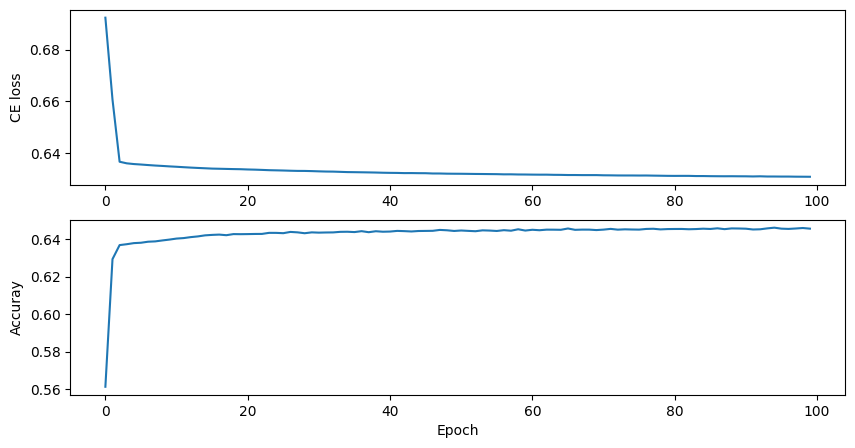

In [ ]:
import torch.nn as nn
from torch.optim import SGD, Adam
import torch

BATCH_SIZE = 128
EPOCHS = 100
LR = 0.01
DEVICE = get_device()


dataloader, n_samples, n_classes = get_loan_status(df, BATCH_SIZE)

model = LoanstatusClassifier().to(DEVICE)

#pos_weights =  torch.tensor([/ 318144]).to(DEVICE)  #   fully paid / charge off
loss_function = nn.BCELoss()
optimizer = SGD(model.parameters(), lr=LR)

losses, accs, gmean = [], [], []
for epoch in range(EPOCHS):
    epoch_loss, epoch_acc = train_binary(dataloader, n_samples, model, loss_function, optimizer, DEVICE)

    losses.append(epoch_loss)
    accs.append(epoch_acc)
    print(f"Epoch: {epoch + 1}")
    print(f"Loss: {epoch_loss:.4f} - Acc: {epoch_acc:.4f}\n")

vis_losses_accs(losses, accs)

In [ ]:
import torch.nn as nn
from torch.optim import SGD, Adam
import torch

BATCH_SIZE = 128
EPOCHS = 100
LR = 0.01
DEVICE = get_device()


dataloader, n_samples, n_classes = get_loan_status(df, BATCH_SIZE)

model = LoanstatusClassifier().to(DEVICE)

pos_weights =  torch.tensor([318144/ 77610]).to(DEVICE)  #fully paid/  charge off
loss_function = nn.BCEWithLogitsLoss(pos_weight=pos_weights)
optimizer = SGD(model.parameters(), lr=LR)

losses, accs = [], []
for epoch in range(EPOCHS):
    epoch_loss, epoch_acc = train_binary(dataloader, n_samples, model, loss_function, optimizer, DEVICE)

    losses.append(epoch_loss)
    accs.append(epoch_acc)
    print(f"Epoch: {epoch + 1}")
    print(f"Loss: {epoch_loss:.4f} - Acc: {epoch_acc:.4f}\n")

vis_losses_accs(losses, accs)


#### sub_grade

In [ ]:
import torch.nn as nn
from torch.optim import SGD


BATCH_SIZE = 128
EPOCHS = 100
LR = 0.01
DEVICE = get_device()


dataloader, n_samples, n_classes = get_sub_grade(df, BATCH_SIZE)

model = GradeClassifier().to(DEVICE)
loss_function = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=LR)

losses, accs = [], []
for epoch in range(EPOCHS):
    epoch_loss, epoch_acc = train(dataloader, n_samples, model, loss_function,optimizer, DEVICE)

    losses.append(epoch_loss)
    accs.append(epoch_acc)

    print(f"Epoch: {epoch + 1}")
    print(f"Loss: {epoch_loss:.4f} - Acc: {epoch_acc:.4f}\n")

vis_losses_accs(losses, accs)